In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.utils import to_categorical

In [5]:
# prompt: unzip the Brain_Tumor_Dataset.zip folder and save it as BTD folder

import zipfile

zip_file_path = 'Brain_Tumor_Dataset.zip'
destination_folder = 'BTD'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"'{zip_file_path}' unzipped successfully into '{destination_folder}'")


'Brain_Tumor_Dataset.zip' unzipped successfully into 'BTD'


In [8]:
IMG_SIZE = 128  # Adjustable (224 for deeper models like VGG16)

# Path to dataset
data_dir = "BTD"
categories = ["glioma_tumor", "meningioma_tumor", "normal", "pituitary_tumor"]

data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, "Brain_Tumor_Dataset", category)
    class_label = categories.index(category)  # Assign labels (0 to 3)

    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)  # Load image
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize
            data.append(img_array)
            labels.append(class_label)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

# Convert to NumPy arrays
data = np.array(data) / 255.0  # Normalize to [0,1]
labels = np.array(labels)

# One-hot encode labels for multi-class classification
labels = to_categorical(labels, num_classes=4)

print(f"Dataset size: {data.shape}, Labels: {labels.shape}")

Dataset size: (3096, 128, 128, 3), Labels: (3096, 4)


In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (2167, 128, 128, 3), Validation set: (464, 128, 128, 3), Test set: (465, 128, 128, 3)


In [10]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [12]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

history = model.fit(train_generator,
                    epochs=30,  # Adjust as needed
                    validation_data=(X_val, y_val),
                    batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.3047 - loss: 1.3800 - val_accuracy: 0.3017 - val_loss: 1.3418
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.3697 - loss: 1.3101 - val_accuracy: 0.4138 - val_loss: 1.1969
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.4376 - loss: 1.2207 - val_accuracy: 0.4741 - val_loss: 1.1734
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.4683 - loss: 1.1866 - val_accuracy: 0.5539 - val_loss: 1.0060
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.5156 - loss: 1.0787 - val_accuracy: 0.5259 - val_loss: 1.0353
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.5554 - loss: 1.0591 - val_accuracy: 0.6293 - val_loss: 0.8578
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.5860 - loss: 0.9418 - val_accuracy: 0.5603 - val_loss: 1.0279
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.5860 - loss: 0.9804 - val_accuracy: 0

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8206 - loss: 0.5197
Test Accuracy: 80.00%


Saving P_5.jpg to P_5.jpg
User uploaded file "P_5.jpg"


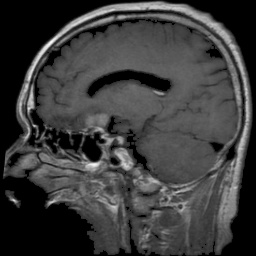

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Tumor Type: Pituitary Tumor (Confidence: 71.79%)


In [25]:
from google.colab import files
from IPython.display import display, Image as IPyImage
import io

def upload_and_predict(model):
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f'User uploaded file "{filename}"')

        display(IPyImage(filename))

        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        predict_image(filename, model)

upload_and_predict(model)
